# Regression Example

### Creating Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

/home/hdsingh/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))

In [3]:
# y = mx + b + noise
m = 0.5
b = 5

y_true = (m*x_data) + b + noise

In [4]:
my_data = pd.concat([pd.DataFrame(x_data,columns=['X']),pd.DataFrame(y_true,columns=['Y'])],axis = 1);

In [5]:
my_data.head()

,X,Y
0,0.00000,4.245912
1,0.00001,2.380314
2,0.00002,4.024595
3,0.00003,5.364227
4,0.00004,4.305204


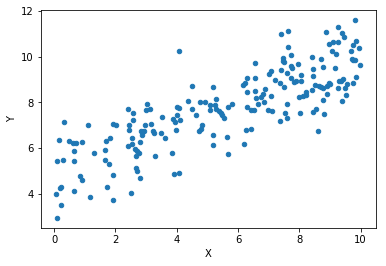

In [6]:
my_data.sample(200).plot(kind = 'scatter',x = 'X',y = 'Y')

## Tensorflow

### Batchsize

In [12]:
batch_size = 8

In [40]:
m  = tf.Variable(0.9)
b  = tf.Variable(1.0)

In [41]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [42]:
y_model = m*xph + b

In [43]:
error = tf.reduce_sum(tf.square(yph - y_model))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(error)

In [44]:
init = tf.global_variables_initializer()

In [54]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches =10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size = batch_size)
        feed = {xph:x_data[rand_ind],
                     yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
    
    model_m, model_b = sess.run([m,b])

In [55]:
model_m

0.50523627

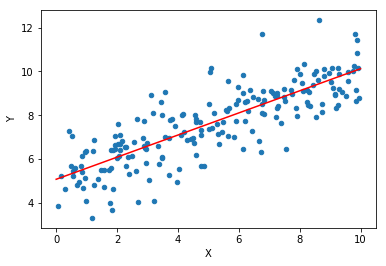

In [56]:
y_hat = x_data*model_m + model_b
my_data.sample(200).plot(kind = 'scatter',x = 'X',y = 'Y')
plt.plot(x_data,y_hat,'r')

# tf.estimator API

### Create Feature Columns

In [7]:
feat_cols = [tf.feature_column.numeric_column('X',shape = [1])]

### Estimator

In [8]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_evaluation_master': '', '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_session_config': None, '_master': '', '_num_ps_replicas': 0, '_train_distribute': None, '_save_checkpoints_secs': 600, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_task_type': 'worker', '_model_dir': '/tmp/tmpeuymux9d', '_tf_random_seed': None, '_global_id_in_cluster': 0, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f227c02aa58>, '_keep_checkpoint_max': 5, '_task_id': 0, '_num_worker_replicas': 1, '_log_step_count_steps': 100}


### Input_functions

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_true,test_size=0.3,random_state = 101)

In [21]:
input_func = tf.estimator.inputs.numpy_input_fn({'X':X_train},
                                                y_train,batch_size = 8,
                                                num_epochs = None,
                                                shuffle=True)

In [22]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'X':X_train},
                                               y_train,batch_size = 8,
                                                num_epochs = 1000,
                                                shuffle=False)

In [23]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'X':X_test},
                                                y_test,batch_size = 8,
                                                num_epochs = 1000,
                                                shuffle=False)

### Train

In [24]:
estimator.train(input_fn = input_func,steps = 1000 )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpeuymux9d/model.ckpt.
INFO:tensorflow:step = 0, loss = 505.9621
INFO:tensorflow:global_step/sec: 946.622
INFO:tensorflow:step = 100, loss = 20.21925 (0.106 sec)
INFO:tensorflow:global_step/sec: 1197.77
INFO:tensorflow:step = 200, loss = 5.9340672 (0.083 sec)
INFO:tensorflow:global_step/sec: 1229.77
INFO:tensorflow:step = 300, loss = 26.102907 (0.081 sec)
INFO:tensorflow:global_step/sec: 1137.22
INFO:tensorflow:step = 400, loss = 8.998402 (0.088 sec)
INFO:tensorflow:global_step/sec: 1240.49
INFO:tensorflow:step = 500, loss = 10.897887 (0.080 sec)
INFO:tensorflow:global_step/sec: 1137.85
INFO:tensorflow:step = 600, loss = 7.172454 (0.088 sec)
INFO:tensorflow:global_step/sec: 1140.03
INFO:tensorflow:step

In [25]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-25-01:06:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpeuymux9d/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-10-25-01:06:56
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1014736, global_step = 1000, loss = 8.811789


### Evaluate

In [26]:
eval_metrics = estimator.evaluate(input_fn=test_input_func,steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-25-01:08:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpeuymux9d/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-10-25-01:08:12
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0718917, global_step = 1000, loss = 8.575133


In [30]:
print("TRAIN METRICS:")
print(train_metrics)
print('\n')
print("TEST METRICS:")
print(eval_metrics)

TRAIN METRICS:
{'global_step': 1000, 'average_loss': 1.1014736, 'loss': 8.811789}


TEST METRICS:
{'global_step': 1000, 'average_loss': 1.0718917, 'loss': 8.575133}


### Predict

In [35]:
new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'X':new_data},shuffle= False)

In [36]:
list(estimator.predict(input_fn=input_fn_predict ))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpeuymux9d/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.3900375], dtype=float32)},
 {'predictions': array([5.045404], dtype=float32)},
 {'predictions': array([5.70077], dtype=float32)},
 {'predictions': array([6.3561363], dtype=float32)},
 {'predictions': array([7.0115023], dtype=float32)},
 {'predictions': array([7.666868], dtype=float32)},
 {'predictions': array([8.322235], dtype=float32)},
 {'predictions': array([8.9776], dtype=float32)},
 {'predictions': array([9.632967], dtype=float32)},
 {'predictions': array([10.288333], dtype=float32)}]

In [37]:
predictions = []
for pred in list(estimator.predict(input_fn=input_fn_predict )):
    predictions.append(pred['predictions'])
predictions

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpeuymux9d/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[array([4.3900375], dtype=float32),
 array([5.045404], dtype=float32),
 array([5.70077], dtype=float32),
 array([6.3561363], dtype=float32),
 array([7.0115023], dtype=float32),
 array([7.666868], dtype=float32),
 array([8.322235], dtype=float32),
 array([8.9776], dtype=float32),
 array([9.632967], dtype=float32),
 array([10.288333], dtype=float32)]

### Plot

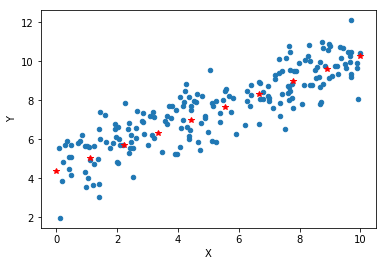

In [41]:
my_data.sample(200).plot(kind = 'scatter',x = 'X',y = 'Y')
plt.plot(new_data,predictions,'r*')